# NLP
- 딥러닝
- RNN 언어 모델

## 딥러닝

### 신경망 
- 여러 뉴런들의 연결
- 퍼셉트론= 하나의 뉴런 : 다중선형회귀 + 활성함수


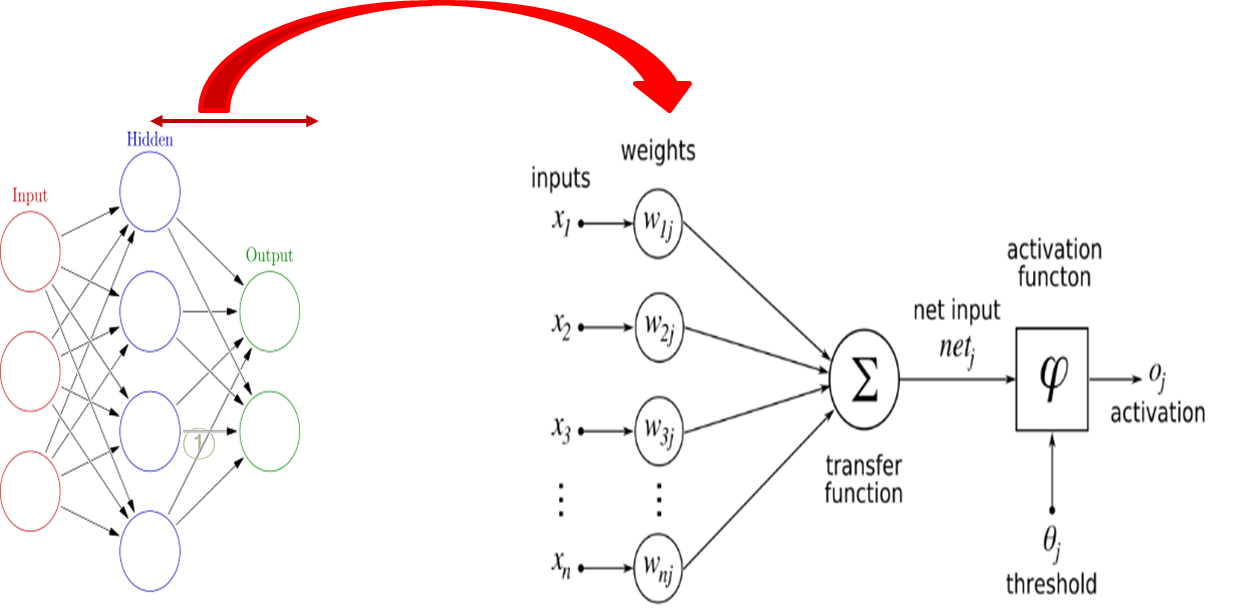

- 활성함수 : 출력 값을 일정 범위화 ( 0 or 1,  0 ~ N, -1 ~ +1 )
    - sigmoid : 0 ~ 1  (= 0 or 1)


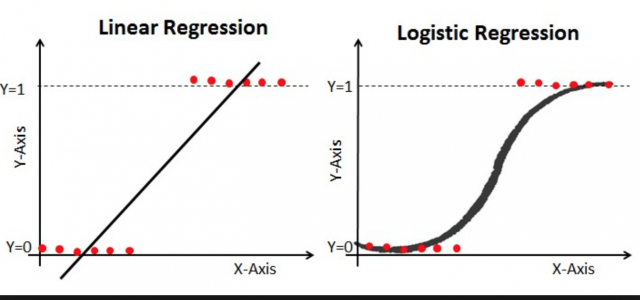


- softmax : 각 class (=output)의 logistic 출력값을 전체 class 들의 출력값 합으로 나눈 것 
    


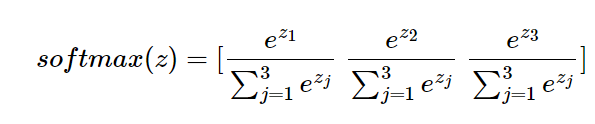

### Keras 로 구현

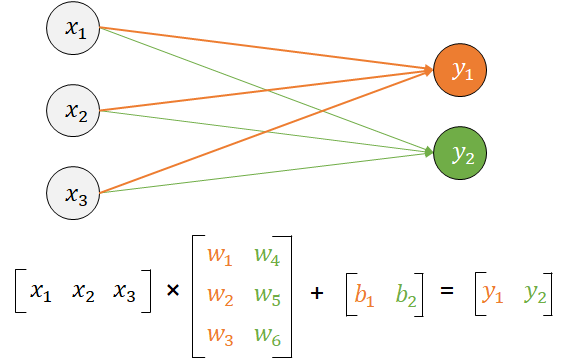

- 모델 구조

In [2]:
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.1/230.1 MB 2.4 MB/s eta 0:00:0000:0100:03
  Using cached libclang-16.0.0-py2.py3-none-macosx_10_9_x86_64.whl (26.7 MB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 2.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 2.5 MB/s eta 0:00:0000:0100:01
  Using cached termcolor-2.3.0-py3-none-any.whl (6.9 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.3/400.3 kB 2.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 2.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 2.2 MB/s eta 0:00:0000:0100:01
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 2.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 2.9 MB/s eta 0:

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

# 3개의 입력과 2개의 출력 
model.add(Dense(2, input_dim=3, activation='softmax'))

2023-05-31 10:05:27.714989: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


- 모델 구조 출력 해보기

In [2]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 8         
                                                                 
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________


### 학습 방법
- 손실을 최소화하는 방향으로 weight들을 update
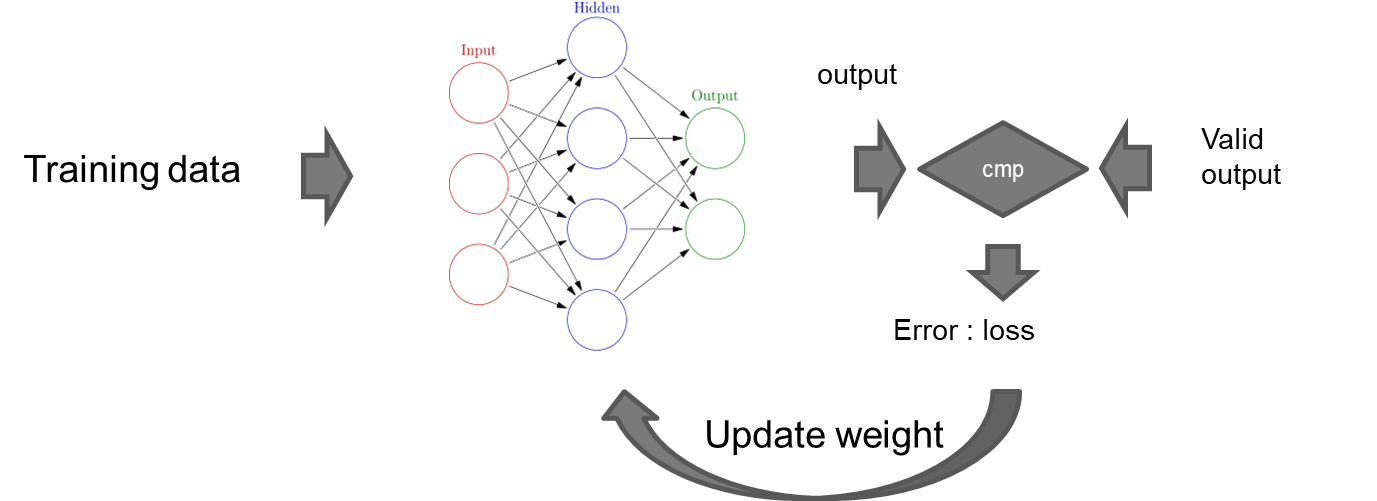

- 손실함수 : 손실을 계산하는 함수
    -  Binary Cross-Entropy : 출력이 1개(0 ~1)일 때 틀리는 경우
    -  Categorical Cross-Entropy : 다중 분류에서 클래스가 틀리는 경우
    
- optimizer : 손실을 최소화하는 파라메터를 찾아가는 알고리즘 (adam, sgd, adagrad, rmsprop.. )
- 역전파

In [3]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

### Iris 분류하기

In [4]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

from keras import models
from keras import layers
from keras.utils import to_categorical

# 모델 구조
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(4,)))  # hidden node 512 개
model.add(layers.Dense(3, activation='softmax')) # 3개 품종 중 하나

#  학습 구조
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['acc'])


# 데이터 준비
iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# lable 0,1,2 -> one hot 3 class
train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)

# 학습 
model.fit(X_train, train_labels, epochs=20, batch_size=40)  # 학습데이터 중 40개의 loss 계산해서 업데이트 하기를  50회 

Epoch 1/20
3/3 [==============================] - 0s 2ms/step - loss: 1.2126 - acc: 0.2857
Epoch 2/20
3/3 [==============================] - 0s 887us/step - loss: 1.0589 - acc: 0.3333
Epoch 3/20
3/3 [==============================] - 0s 757us/step - loss: 0.9715 - acc: 0.3333
Epoch 4/20
3/3 [==============================] - 0s 980us/step - loss: 0.8860 - acc: 0.6952
Epoch 5/20
3/3 [==============================] - 0s 1ms/step - loss: 0.8191 - acc: 0.8095
Epoch 6/20
3/3 [==============================] - 0s 1ms/step - loss: 0.7672 - acc: 0.8571
Epoch 7/20
3/3 [==============================] - 0s 1ms/step - loss: 0.7141 - acc: 0.6667
Epoch 8/20
3/3 [==============================] - 0s 1ms/step - loss: 0.6723 - acc: 0.6667
Epoch 9/20
3/3 [==============================] - 0s 892us/step - loss: 0.6365 - acc: 0.6762
Epoch 10/20
3/3 [==============================] - 0s 1ms/step - loss: 0.6065 - acc: 0.8476
Epoch 11/20
3/3 [==============================] - 0s 957us/step - loss: 0.5805 -

### test

In [5]:
#
# Get the accuracy of test data set
#
print (model.predict(X_test))  # 합이 1이 되는 확률 벡터 -> max 값을 class로 선택
test_loss, test_acc = model.evaluate(X_test, test_labels)
#
# Print the test accuracy
#
print('Test Accuracy: ', test_acc, '\nTest Loss: ', test_loss)

2/2 [==============================] - 0s 1ms/step
[[0.00608829 0.3359681  0.65794355]
 [0.04370304 0.4567413  0.49955562]
 [0.02382974 0.41779214 0.5583781 ]
 [0.05755357 0.44776294 0.4946834 ]
 [0.02792279 0.37756646 0.59451073]
 [0.00903106 0.27590197 0.71506697]
 [0.053633   0.4755545  0.47081253]
 [0.08391629 0.5177953  0.39828843]
 [0.8693325  0.10775756 0.02290991]
 [0.01903342 0.36251855 0.618448  ]
 [0.9576733  0.03638498 0.0059418 ]
 [0.8621647  0.10884939 0.02898602]
 [0.00679696 0.32551175 0.6676913 ]
 [0.01467518 0.35137492 0.6339499 ]
 [0.9027705  0.0804842  0.01674524]
 [0.0152539  0.27070537 0.71404076]
 [0.14130361 0.49636617 0.36233026]
 [0.9207537  0.06609081 0.01315546]
 [0.824816   0.13765669 0.03752731]
 [0.9078695  0.07683539 0.01529515]
 [0.07476559 0.5147565  0.41047794]
 [0.88997644 0.0895147  0.02050891]
 [0.07268573 0.53106695 0.3962474 ]
 [0.00732864 0.2633484  0.72932297]
 [0.03086849 0.37813798 0.5909935 ]
 [0.07150377 0.488547   0.43994927]
 [0.04980283 

### 과제1 : hidden layer 1계층 (256뉴런)를 추가하여 성능을 비교하시오

In [6]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
ㄴ
from keras import models
from keras import layers
from keras.utils import to_categorical

# 모델 구조
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(4,)))
model.add(layers.Dense(512, activation='relu'))  # hidden node 512 개
model.add(layers.Dense(3, activation='softmax')) # 3개 품종 중 하나

#  학습 구조
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['acc'])


# 데이터 준비
iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# lable 0,1,2 -> one hot 3 class
train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)

# 학습 
model.fit(X_train, train_labels, epochs=20, batch_size=40)  # 학습데이터 중 40개의 loss 계산해서 업데이트 하기를  50회 

Epoch 1/20
3/3 [==============================] - 0s 2ms/step - loss: 1.1568 - acc: 0.4190
Epoch 2/20
3/3 [==============================] - 0s 1ms/step - loss: 0.8352 - acc: 0.7143
Epoch 3/20
3/3 [==============================] - 0s 2ms/step - loss: 0.7409 - acc: 0.6667
Epoch 4/20
3/3 [==============================] - 0s 1ms/step - loss: 0.5914 - acc: 0.7524
Epoch 5/20
3/3 [==============================] - 0s 2ms/step - loss: 0.5493 - acc: 0.7143
Epoch 6/20
3/3 [==============================] - 0s 2ms/step - loss: 0.4785 - acc: 0.8381
Epoch 7/20
3/3 [==============================] - 0s 2ms/step - loss: 0.4415 - acc: 0.6952
Epoch 8/20
3/3 [==============================] - 0s 2ms/step - loss: 0.3991 - acc: 0.9048
Epoch 9/20
3/3 [==============================] - 0s 2ms/step - loss: 0.3715 - acc: 0.9619
Epoch 10/20
3/3 [==============================] - 0s 2ms/step - loss: 0.3449 - acc: 0.9619
Epoch 11/20
3/3 [==============================] - 0s 2ms/step - loss: 0.3168 - acc: 0.96

In [8]:
# print(model.predict(X_test))  # 합이 1이 되는 확률 벡터 -> max 값을 class로 선택
test_loss, test_acc = model.evaluate(X_test, test_labels)

print('Test Accuracy: ', test_acc, '\nTest Loss: ', test_loss)

## 정확도가 0.95로 상승함

2/2 [==============================] - 0s 2ms/step - loss: 0.1879 - acc: 0.9556
Test Accuracy:  0.9555555582046509 
Test Loss:  0.18789337575435638


### drop out 
- 과적합 방지를 위해 학습 과정에서 일정 뉴런을 사용했다 , 하지 않았다 하는 것
- model.add(Dropout(0.5))  을 계층 뒤에 추가함

In [ ]:

# 모델 구조
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(4,)))  # hidden node 512 개
model.add(Dropout(0.5))
model.add(layers.Dense(3, activation='softmax')) # 3개 품종 중 하나

# 학습 구조
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['acc'])

---

## 언어모델

- 단어에 확률 할당 : 이전 단어들로 부터 다음 단어 예측 or 문맥을 주고 빈 칸을 예측
- 코퍼스(말뭉치, 대규모 텍스트)로 부터 단어들의 시퀀스(어텐션) 확률을 학습함 => 다음 단어로 가장 높은 확률의 단어를 출력 = 생성
- 예) An adorable little boy가 나왔을 때, is가 나올 확률 P는 코퍼스로 부터 다음과 같이 구할 수 있음

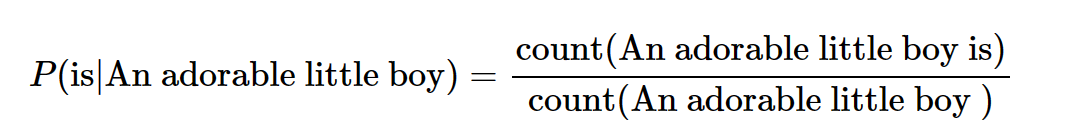
    

    

### RNN 

- 시퀀스를 기억하는 셀로 구성 : y 값은 x값과 이전 y값의 영향을 받음
    
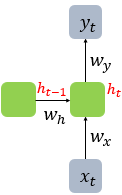

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN

model = Sequential()
model.add(SimpleRNN(3, input_length=2, input_dim=10))  # 시퀀스 길이가 2인  10개의 x 값의 입력을 받음 , 3개의 hidden unit 
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 3)                 42        
                                                                 
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


### RNN 언어 모델 

In [37]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

- 네이버 영화평 코퍼스 읽기

In [40]:
import pandas as pd
import re

nsmc_train_df = pd.read_csv('ratings_train.txt', encoding='utf8', sep='\t', engine='python')
nsmc_train_df = nsmc_train_df[nsmc_train_df['document'].notnull()]
nsmc_train_df['document'] = nsmc_train_df['document'].apply(lambda x : re.sub(r'[^ ㄱ-ㅎㅣ가-힣]+', " ", x))

In [39]:
text=nsmc_train_df['document'][:5]
print (text)
tarr=text.array

0                                   아 더빙  진짜 짜증나네요 목소리
1                         흠 포스터보고 초딩영화줄 오버연기조차 가볍지 않구나
2                                    너무재밓었다그래서보는것을추천한다
3                          교도소 이야기구먼  솔직히 재미는 없다 평점 조정
4    사이몬페그의 익살스런 연기가 돋보였던 영화 스파이더맨에서 늙어보이기만 했던 커스틴 ...
Name: document, dtype: object


- 단어 집합 확인 : 단어 별로 index (or label) 붙임

In [41]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tarr)  #  단어 별로 index 
vocab_size = len(tokenizer.word_index) + 1
print('단어 집합의 크기 : %d' % vocab_size)
print(tokenizer.word_index)

단어 집합의 크기 : 32
{'아': 1, '더빙': 2, '진짜': 3, '짜증나네요': 4, '목소리': 5, '흠': 6, '포스터보고': 7, '초딩영화줄': 8, '오버연기조차': 9, '가볍지': 10, '않구나': 11, '너무재밓었다그래서보는것을추천한다': 12, '교도소': 13, '이야기구먼': 14, '솔직히': 15, '재미는': 16, '없다': 17, '평점': 18, '조정': 19, '사이몬페그의': 20, '익살스런': 21, '연기가': 22, '돋보였던': 23, '영화': 24, '스파이더맨에서': 25, '늙어보이기만': 26, '했던': 27, '커스틴': 28, '던스트가': 29, '너무나도': 30, '이뻐보였다': 31}


- texts_to_sequences : text를  index sequnce로 표현  

In [42]:
sequences = list()
for line in tarr: 
    encoded = tokenizer.texts_to_sequences([line])[0]  # 라인을 index sequnce로 표현 
    for i in range(1, len(encoded)):  # 5개 단어로 구성된 문장 => 다음 단어를 예측할 수 있는 4개의 샘플이 됨
        sequence = encoded[:i+1]
        sequences.append(sequence)

print('학습에 사용할 샘플의 개수: %d' % len(sequences))

학습에 사용할 샘플의 개수: 26


In [43]:
print(sequences)

[[1, 2], [1, 2, 3], [1, 2, 3, 4], [1, 2, 3, 4, 5], [6, 7], [6, 7, 8], [6, 7, 8, 9], [6, 7, 8, 9, 10], [6, 7, 8, 9, 10, 11], [13, 14], [13, 14, 15], [13, 14, 15, 16], [13, 14, 15, 16, 17], [13, 14, 15, 16, 17, 18], [13, 14, 15, 16, 17, 18, 19], [20, 21], [20, 21, 22], [20, 21, 22, 23], [20, 21, 22, 23, 24], [20, 21, 22, 23, 24, 25], [20, 21, 22, 23, 24, 25, 26], [20, 21, 22, 23, 24, 25, 26, 27], [20, 21, 22, 23, 24, 25, 26, 27, 28], [20, 21, 22, 23, 24, 25, 26, 27, 28, 29], [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]]


In [44]:
max_len = max(len(l) for l in sequences) # 모든 샘플에서 길이가 가장 긴 샘플의 길이 출력
print('샘플의 최대 길이 : {}'.format(max_len))

샘플의 최대 길이 : 12


In [45]:
sequences = pad_sequences(sequences, maxlen=max_len, padding='pre')

In [46]:
print(sequences)

[[ 0  0  0  0  0  0  0  0  0  0  1  2]
 [ 0  0  0  0  0  0  0  0  0  1  2  3]
 [ 0  0  0  0  0  0  0  0  1  2  3  4]
 [ 0  0  0  0  0  0  0  1  2  3  4  5]
 [ 0  0  0  0  0  0  0  0  0  0  6  7]
 [ 0  0  0  0  0  0  0  0  0  6  7  8]
 [ 0  0  0  0  0  0  0  0  6  7  8  9]
 [ 0  0  0  0  0  0  0  6  7  8  9 10]
 [ 0  0  0  0  0  0  6  7  8  9 10 11]
 [ 0  0  0  0  0  0  0  0  0  0 13 14]
 [ 0  0  0  0  0  0  0  0  0 13 14 15]
 [ 0  0  0  0  0  0  0  0 13 14 15 16]
 [ 0  0  0  0  0  0  0 13 14 15 16 17]
 [ 0  0  0  0  0  0 13 14 15 16 17 18]
 [ 0  0  0  0  0 13 14 15 16 17 18 19]
 [ 0  0  0  0  0  0  0  0  0  0 20 21]
 [ 0  0  0  0  0  0  0  0  0 20 21 22]
 [ 0  0  0  0  0  0  0  0 20 21 22 23]
 [ 0  0  0  0  0  0  0 20 21 22 23 24]
 [ 0  0  0  0  0  0 20 21 22 23 24 25]
 [ 0  0  0  0  0 20 21 22 23 24 25 26]
 [ 0  0  0  0 20 21 22 23 24 25 26 27]
 [ 0  0  0 20 21 22 23 24 25 26 27 28]
 [ 0  0 20 21 22 23 24 25 26 27 28 29]
 [ 0 20 21 22 23 24 25 26 27 28 29 30]
 [20 21 22 23 24 25 26 27

In [47]:
sequences = np.array(sequences)
X = sequences[:,:-1]  # 각 샘플 시퀀스의 마지막이 예측할 다음 단어
y = sequences[:,-1] # 마지막 단어에 index

In [48]:
print(X)
print(y)

[[ 0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  1  2]
 [ 0  0  0  0  0  0  0  0  1  2  3]
 [ 0  0  0  0  0  0  0  1  2  3  4]
 [ 0  0  0  0  0  0  0  0  0  0  6]
 [ 0  0  0  0  0  0  0  0  0  6  7]
 [ 0  0  0  0  0  0  0  0  6  7  8]
 [ 0  0  0  0  0  0  0  6  7  8  9]
 [ 0  0  0  0  0  0  6  7  8  9 10]
 [ 0  0  0  0  0  0  0  0  0  0 13]
 [ 0  0  0  0  0  0  0  0  0 13 14]
 [ 0  0  0  0  0  0  0  0 13 14 15]
 [ 0  0  0  0  0  0  0 13 14 15 16]
 [ 0  0  0  0  0  0 13 14 15 16 17]
 [ 0  0  0  0  0 13 14 15 16 17 18]
 [ 0  0  0  0  0  0  0  0  0  0 20]
 [ 0  0  0  0  0  0  0  0  0 20 21]
 [ 0  0  0  0  0  0  0  0 20 21 22]
 [ 0  0  0  0  0  0  0 20 21 22 23]
 [ 0  0  0  0  0  0 20 21 22 23 24]
 [ 0  0  0  0  0 20 21 22 23 24 25]
 [ 0  0  0  0 20 21 22 23 24 25 26]
 [ 0  0  0 20 21 22 23 24 25 26 27]
 [ 0  0 20 21 22 23 24 25 26 27 28]
 [ 0 20 21 22 23 24 25 26 27 28 29]
 [20 21 22 23 24 25 26 27 28 29 30]]
[ 2  3  4  5  7  8  9 10 11 14 15 16 17 18 19 21 22 23 24 25 26

In [49]:
y = to_categorical(y, num_classes=vocab_size)  # one hot encoding

- 네트워크 구성 및 학습
    - index 인 X 도 vocabulary size 인 one hot 임
    - Embedding : vocabulary # nodes-> embedding nodes 되도록 weights 학습 , activation이 없음
    

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, SimpleRNN, LSTM

embedding_dim = 10
hidden_units = 64

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))  
model.add(LSTM(hidden_units))
model.add(Dense(vocab_size, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=100, verbose=2)

Epoch 1/100
1/1 - 1s - loss: 3.4652 - accuracy: 0.0385 - 730ms/epoch - 730ms/step
Epoch 2/100
1/1 - 0s - loss: 3.4630 - accuracy: 0.0769 - 7ms/epoch - 7ms/step
Epoch 3/100
1/1 - 0s - loss: 3.4608 - accuracy: 0.1154 - 8ms/epoch - 8ms/step
Epoch 4/100
1/1 - 0s - loss: 3.4586 - accuracy: 0.1154 - 7ms/epoch - 7ms/step
Epoch 5/100
1/1 - 0s - loss: 3.4562 - accuracy: 0.1154 - 7ms/epoch - 7ms/step
Epoch 6/100
1/1 - 0s - loss: 3.4537 - accuracy: 0.1154 - 6ms/epoch - 6ms/step
Epoch 7/100
1/1 - 0s - loss: 3.4511 - accuracy: 0.1154 - 7ms/epoch - 7ms/step
Epoch 8/100
1/1 - 0s - loss: 3.4482 - accuracy: 0.0769 - 6ms/epoch - 6ms/step
Epoch 9/100
1/1 - 0s - loss: 3.4452 - accuracy: 0.0769 - 5ms/epoch - 5ms/step
Epoch 10/100
1/1 - 0s - loss: 3.4418 - accuracy: 0.0385 - 4ms/epoch - 4ms/step
Epoch 11/100
1/1 - 0s - loss: 3.4380 - accuracy: 0.0385 - 5ms/epoch - 5ms/step
Epoch 12/100
1/1 - 0s - loss: 3.4339 - accuracy: 0.0385 - 4ms/epoch - 4ms/step
Epoch 13/100
1/1 - 0s - loss: 3.4293 - accuracy: 0.0385 -

- 문장생성

In [51]:
def sentence_generation(model, tokenizer, current_word, n): # 모델, 토크나이저, 현재 단어, 반복할 횟수
    init_word = current_word
    sentence = ''

    # n번 반복
    for _ in range(n):
        # 현재 단어에 대한 정수 인코딩과 패딩
        encoded = tokenizer.texts_to_sequences([current_word])[0]
        
        encoded = pad_sequences([encoded], maxlen=5, padding='pre')
        #print (encoded)
        # 입력한 X(현재 단어)에 대해서 Y를 예측하고 Y(예측한 단어)를 result에 저장.
        result = model.predict(encoded, verbose=0)
        result = np.argmax(result, axis=1) # 가장 확률이 높은 단어 선택
        for word, index in tokenizer.word_index.items(): 
            # 만약 예측한 단어와 인덱스와 동일한 단어를 word에 
            if index == result:  # word를 꺼내기 위함
                break
                

        # 현재 단어 + ' ' + 예측 단어를 현재 단어로 변경
        current_word = current_word + ' '  + word

        # 예측 단어를 문장에 저장
        sentence = sentence + ' ' + word

    sentence = init_word + sentence
    return sentence

In [52]:
print(sentence_generation(model, tokenizer, '교도소', 5))

교도소 돋보였던 돋보였던 했던 커스틴 너무나도


### 과제 2 :  RNN 대신 LSTM으로, 그리고 문서 갯수 늘려서 (100개) 해보기



In [119]:
import pandas as pd
import re

nsmc_train_df = pd.read_csv('ratings_train.txt', encoding='utf8', sep='\t', engine='python')
nsmc_train_df = nsmc_train_df[nsmc_train_df['document'].notnull()]
nsmc_train_df['document'] = nsmc_train_df['document'].apply(lambda x : re.sub(r'[^ ㄱ-ㅎㅣ가-힣]+', " ", x))

In [120]:
text=nsmc_train_df['document'][:100]
print (text)
tarr=text.array

0                                    아 더빙  진짜 짜증나네요 목소리
1                          흠 포스터보고 초딩영화줄 오버연기조차 가볍지 않구나
2                                     너무재밓었다그래서보는것을추천한다
3                           교도소 이야기구먼  솔직히 재미는 없다 평점 조정
4     사이몬페그의 익살스런 연기가 돋보였던 영화 스파이더맨에서 늙어보이기만 했던 커스틴 ...
                            ...                        
95                        어내스트와 셀레스틴 완전 강추에요  정말 재밌습니다 
96                                           재미있는영화입니다 
97                                        클라라볼라고화신본거아닌데
98                                    진짜 보면서 너무 슬펐던 영화다
99             설정이 재밌고 새로운 에피소드 내에서 메인 스토리도 차차 나오는게 재밌음
Name: document, Length: 100, dtype: object


In [121]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tarr)  # 단어 별로 index 
vocab_size = len(tokenizer.word_index) + 1
print('단어 집합의 크기 : %d' % vocab_size)
print(tokenizer.word_index)

단어 집합의 크기 : 687
{'영화': 1, '정말': 2, '진짜': 3, '완전': 4, '이건': 5, '영화가': 6, '다': 7, '점': 8, '이': 9, '아': 10, '평점': 11, 'ㅋㅋㅋ': 12, '너무': 13, '그냥': 14, '잘': 15, '절대': 16, '그래서': 17, '또': 18, '조금': 19, '갈등': 20, '아햏햏': 21, 'ㅋㅋ': 22, '흠': 23, '너무나도': 24, '아까움': 25, '있는': 26, '년대의': 27, '연기': 28, '본': 29, '스토리도': 30, '이기면': 31, '왜': 32, '갈수록': 33, '듯': 34, '보면서': 35, '건': 36, '지루하고': 37, '음식': 38, '바베트의': 39, '넘': 40, '별로': 41, '평범한': 42, '좋았어요': 43, '죄인입니다': 44, '최고': 45, '이렇게': 46, '없고': 47, '하나도': 48, '멋진': 49, '합니다': 50, '물건': 51, '보고': 52, '제일': 53, '감동': 54, '그': 55, '느낌': 56, '없는': 57, '그저': 58, '에피소드': 59, '영화를': 60, '근데': 61, '차': 62, '안이': 63, '뭐냐': 64, '더빙': 65, '짜증나네요': 66, '목소리': 67, '포스터보고': 68, '초딩영화줄': 69, '오버연기조차': 70, '가볍지': 71, '않구나': 72, '너무재밓었다그래서보는것을추천한다': 73, '교도소': 74, '이야기구먼': 75, '솔직히': 76, '재미는': 77, '없다': 78, '조정': 79, '사이몬페그의': 80, '익살스런': 81, '연기가': 82, '돋보였던': 83, '스파이더맨에서': 84, '늙어보이기만': 85, '했던': 86, '커스틴': 87, '던스트가': 88, '이뻐보였다': 89, '막': 90, '걸음마': 91, '뗀': 9

In [122]:
sequences = list()
for line in tarr: 
    encoded = tokenizer.texts_to_sequences([line])[0]  # 라인을 index sequnce로 표현 
    for i in range(1, len(encoded)):  # 5개 단어로 구성된 문장 => 다음 단어를 예측할 수 있는 4개의 샘플이 됨
        sequence = encoded[:i+1]
        sequences.append(sequence)

print('학습에 사용할 샘플의 개수: %d' % len(sequences))

학습에 사용할 샘플의 개수: 687


In [135]:
max_len = max(len(l) for l in sequences) # 모든 샘플에서 길이가 가장 긴 샘플의 길이 출력
print('샘플의 최대 길이 : {}'.format(max_len))

sequences = pad_sequences(sequences, maxlen=max_len, padding='pre') # 앞에 0 채워넣기

샘플의 최대 길이 : 34


In [138]:
sequences = np.array(sequences)
X = sequences[:,:-1]  # 각 샘플 시퀀스의 마지막이 예측할 다음 단어
y = sequences[:,-1] # 마지막 단어에 index

In [139]:
y = to_categorical(y, num_classes=vocab_size)  # one hot encoding

In [143]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(vocab_size, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=50, verbose=2)

model.summary()

Epoch 1/50
22/22 - 1s - loss: 6.5369 - accuracy: 0.0000e+00 - 1s/epoch - 50ms/step
Epoch 2/50
22/22 - 0s - loss: 6.5208 - accuracy: 0.0218 - 333ms/epoch - 15ms/step
Epoch 3/50
22/22 - 0s - loss: 6.4754 - accuracy: 0.0218 - 335ms/epoch - 15ms/step
Epoch 4/50
22/22 - 0s - loss: 6.3867 - accuracy: 0.0131 - 334ms/epoch - 15ms/step
Epoch 5/50
22/22 - 0s - loss: 6.1951 - accuracy: 0.0160 - 335ms/epoch - 15ms/step
Epoch 6/50
22/22 - 0s - loss: 5.9693 - accuracy: 0.0189 - 333ms/epoch - 15ms/step
Epoch 7/50
22/22 - 0s - loss: 5.7746 - accuracy: 0.0204 - 332ms/epoch - 15ms/step
Epoch 8/50
22/22 - 0s - loss: 5.5825 - accuracy: 0.0247 - 336ms/epoch - 15ms/step
Epoch 9/50
22/22 - 0s - loss: 5.4159 - accuracy: 0.0247 - 357ms/epoch - 16ms/step
Epoch 10/50
22/22 - 0s - loss: 5.2537 - accuracy: 0.0349 - 342ms/epoch - 16ms/step
Epoch 11/50
22/22 - 0s - loss: 5.0836 - accuracy: 0.0422 - 352ms/epoch - 16ms/step
Epoch 12/50
22/22 - 0s - loss: 4.9071 - accuracy: 0.0568 - 341ms/epoch - 15ms/step
Epoch 13/50


In [144]:
def sentence_generation(model, tokenizer, current_word, n): # 모델, 토크나이저, 현재 단어, 반복할 횟수
    init_word = current_word
    sentence = ''

    # n번 반복
    for _ in range(n):
        # 현재 단어에 대한 정수 인코딩과 패딩
        encoded = tokenizer.texts_to_sequences([current_word])[0]
        
        encoded = pad_sequences([encoded], maxlen=5, padding='pre')
        #print (encoded)
        # 입력한 X(현재 단어)에 대해서 Y를 예측하고 Y(예측한 단어)를 result에 저장.
        result = model.predict(encoded, verbose=0)
        result = np.argmax(result, axis=1) # 가장 확률이 높은 단어 선택
        for word, index in tokenizer.word_index.items(): 
            # 만약 예측한 단어와 인덱스와 동일한 단어를 word에 
            if index == result:  # word를 꺼내기 위함
                break
                

        # 현재 단어 + ' ' + 예측 단어를 현재 단어로 변경
        current_word = current_word + ' '  + word

        # 예측 단어를 문장에 저장
        sentence = sentence + ' ' + word

    sentence = init_word + sentence
    return sentence

In [145]:
print(sentence_generation(model, tokenizer, '교도소', 5))

교도소 이야기구먼 솔직히 조정 평점 줄게요


---

## RNN을 이용한 영화리뷰 분류

In [147]:
import pandas as pd

nsmc_train_df = pd.read_csv('ratings_train.txt', encoding='utf8', sep='\t', engine='python')
nsmc_test_df = pd.read_csv('ratings_test.txt', encoding='utf8', sep='\t', engine='python')
nsmc_train_df= nsmc_train_df[:10000]
nsmc_test_df= nsmc_test_df[10000:20000]

### 전처리 

In [148]:
# 문자만 남기기
import re

nsmc_test_df['document'] = nsmc_test_df['document'].apply(lambda x : re.sub(r'[^ ㄱ-ㅎㅣ가-힣]+', "", x))
nsmc_train_df['document'] = nsmc_train_df['document'].apply(lambda x : re.sub(r'[^ ㄱ-ㅎㅣ가-힣]+', "", x))

In [149]:
# null 제거 
nsmc_train_df = nsmc_train_df[nsmc_train_df['document'].notnull()]
nsmc_test_df = nsmc_test_df[nsmc_test_df['document'].notnull()]

In [150]:
# document 중복 제거 (추가됨)
nsmc_train_df.drop_duplicates(subset=['document'], inplace=True) 
nsmc_test_df.drop_duplicates(subset=['document'], inplace=True)
nsmc_test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9803 entries, 10000 to 19999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        9803 non-null   int64 
 1   document  9803 non-null   object
 2   label     9803 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 306.3+ KB


### 토크나이징

In [151]:
# stop word 제거

stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [ ]:
from konlpy.tag import Okt
okt=Okt()

X_train = []
for sentence in nsmc_train_df['document']:
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    X_train.append(stopwords_removed_sentence)
    
X_test = []
for sentence in nsmc_test_df['document']:
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    X_test.append(stopwords_removed_sentence)

In [ ]:
# 정수 인코딩

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()  # keras tokenizer
tokenizer.fit_on_texts(X_train)   # 각 단어에 고유한 정수 값 부여
print(tokenizer.word_index)
voca_size = len(tokenizer.size()) + 1

In [ ]:
# 정수 시퀀스 화

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

print (X_train[3])

### 패딩

In [ ]:
X_train = pad_sequences(X_train, maxlen=30) # 최고 길이는 아님 
X_test = pad_sequences(X_test, maxlen=30)

print (X_train[3])

In [ ]:
import numpy as np

y_train = np.array(nsmc_train_df['label'])
y_test = np.array(nsmc_test_df['label'])

### LSTM으로 리뷰 분류

- EarlyStopping : validation loss가 일정 횟수 연속 증가하면 멈춤
- ModelCheckpoint : validation accuracy가 이전보다 증가하면 학습된 weights 를 저장해둠 
- 학습시 (fit) validation을 수행

In [ ]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4) 
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True) 

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2)

In [ ]:
# 학습 epoch간 최고 성능 모델을 load하여 사용 

loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))